In [2]:
#imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv('data.csv')
real_distance = df.iloc[:, 1].values
measured_distance = df.iloc[:, 2].values
power = df.iloc[:, 3].values
delta= df.iloc[:, 4].values

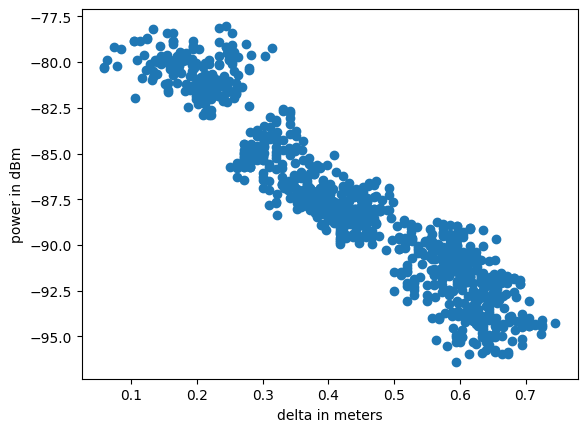

In [4]:
plt.scatter(delta,power)
plt.xlabel('delta in meters')
plt.ylabel('power in dBm')
plt.show()


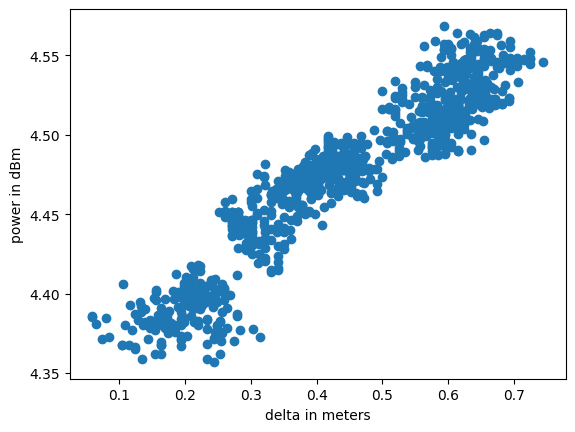

In [5]:
log_power = np.log(power*-1)
plt.scatter(delta,log_power)
plt.xlabel('delta in meters')
plt.ylabel('power in dBm')
plt.show()

In [6]:
polynomial = np.polyfit(delta,log_power,1)
polynomial

array([0.29870913, 4.34376222])

Text(0, 0.5, 'log(power)')

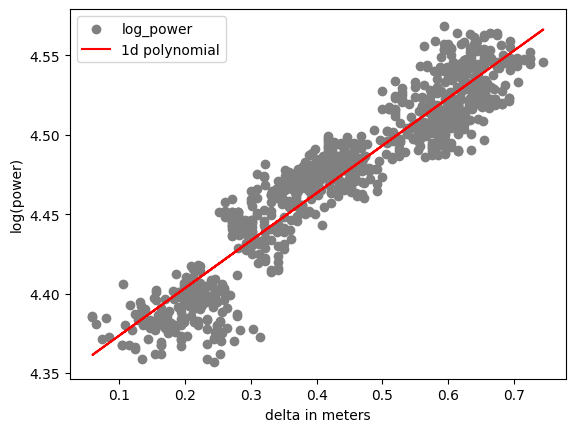

In [7]:
plt.scatter(delta,log_power,c='gray',label='log_power')
plt.plot(delta,np.polyval(polynomial,delta),'r',label='1d polynomial')
plt.legend()
plt.xlabel('delta in meters')
plt.ylabel('log(power)')

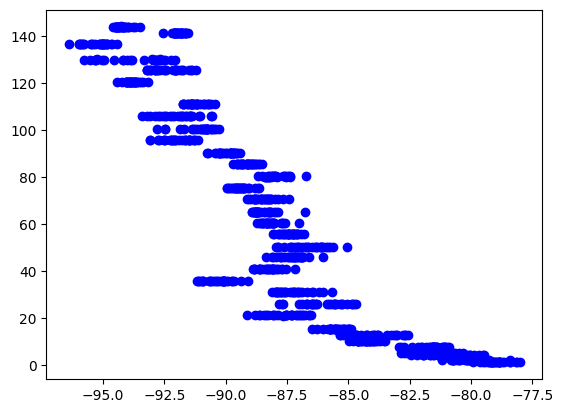

In [8]:
plt.scatter(power,measured_distance,c='blue')
plt.show()

Text(0, 0.5, 'delta in meters')

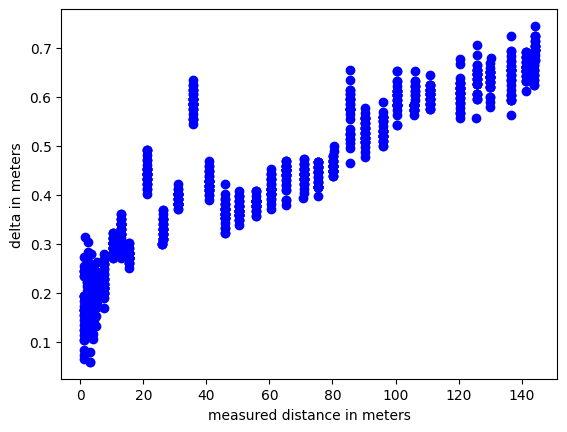

In [9]:
plt.scatter(measured_distance,delta,c='blue')
plt.xlabel('measured distance in meters')
plt.ylabel('delta in meters')

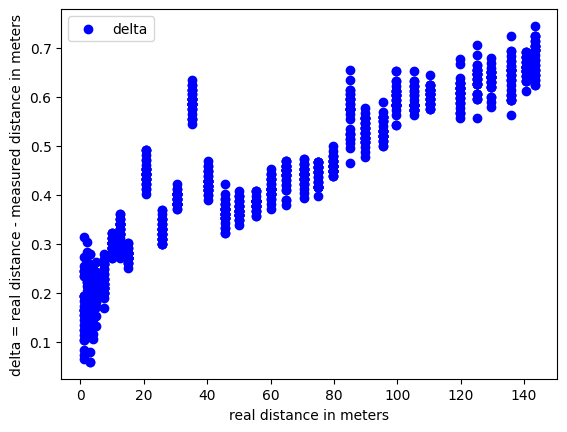

In [10]:
plt.scatter(real_distance,delta,c='blue',label='delta')
plt.xlabel('real distance in meters')
plt.ylabel('delta = real distance - measured distance in meters')
plt.legend()
plt.show()

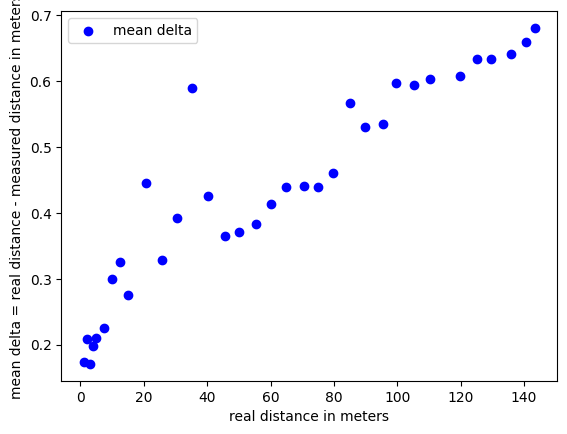

In [11]:
from data_process import load_data_in_batches
df,batches = load_data_in_batches()

real=[]
mean_delta=[]
for reference, batch in batches:
    real.append(reference)
    # print(batch)
    # print("#"*20)
    mean_delta.append(np.mean(batch['delta']))
# plt.scatter(real_distance,delta,c='red',label='delta')
plt.scatter(real,mean_delta,c='blue',label='mean delta')
plt.xlabel('real distance in meters')
plt.ylabel('mean delta = real distance - measured distance in meters')
plt.legend()
plt.show()

In [12]:
from scipy.stats import ttest_1samp

stat,pval=ttest_1samp(a=delta,popmean=0)
print(f"{stat=}, {pval=}")

stat=87.39716500393898, pval=0.0


In [13]:
from scipy.stats import pearsonr
coef,p=pearsonr(delta,log_power)
print(f"{coef=}, {p=}")

coef=0.939877917170305, p=0.0


model.coef_=array([2.95729323]), model.intercept_=-12.794812787864975
LinearRegression()


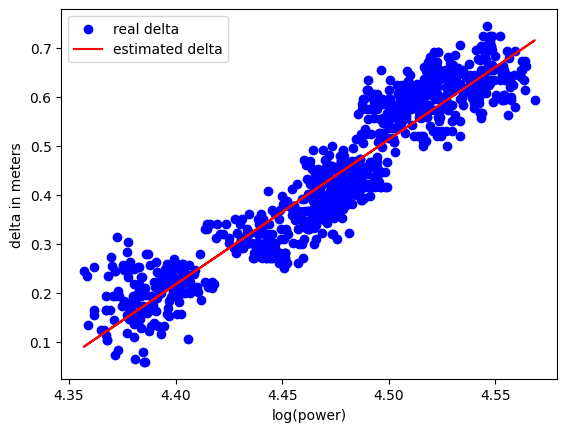

In [14]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
data_for_log = [[x] for x in log_power]
model.fit(X=data_for_log,y=delta)
print(f"{model.coef_=}, {model.intercept_=}")
plt.scatter(data_for_log,delta,c='blue',label='real delta')
plt.plot(data_for_log,model.predict(data_for_log),'r',label='estimated delta')
plt.xlabel('log(power)')
plt.ylabel('delta in meters')
plt.legend()
print(model)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     7604.
Date:                Tue, 16 May 2023   Prob (F-statistic):               0.00
Time:                        11:00:56   Log-Likelihood:                 1506.4
No. Observations:                1006   AIC:                            -3009.
Df Residuals:                    1004   BIC:                            -2999.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -12.7948      0.152    -84.318      0.0

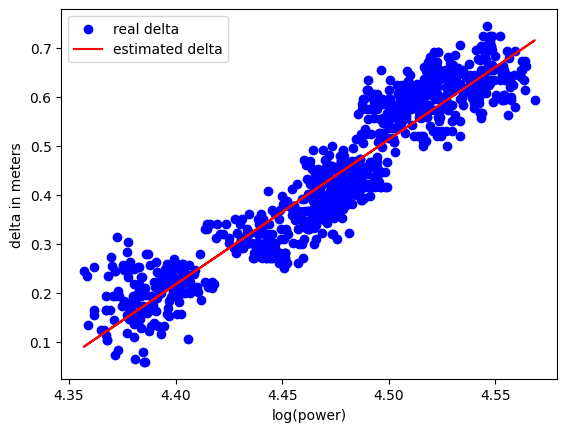

In [23]:
import numpy as np
import statsmodels.api as sm
exog = sm.add_constant(data_for_log)
mod = sm.OLS(delta, exog)
res = mod.fit()
print(res.summary())
print(res.conf_int(0.05))   # 99% confidence interval
plt.scatter(data_for_log,delta,c='blue',label='real delta')
plt.plot(data_for_log,res.predict(exog),'r',label='estimated delta')
plt.xlabel('log(power)')
plt.ylabel('delta in meters')
plt.legend()
plt.show()